In [4]:
from Utils import *

In [5]:
df = pd.read_pickle("cleaned_data.pkl")

In [7]:
df.shape

(396030, 79)

In [8]:
df.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,earliest_cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,10.5,117000.0,26.24,16.0,0.0,36369.0,41.8,...,1990,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,0.0,20131.0,53.3,...,2004,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,0.5,43057.0,12.79,13.0,0.0,11987.0,92.2,...,2007,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,0.0,5472.0,21.5,...,2006,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,0.0,24584.0,69.8,...,1999,0,1,0,0,0,0,0,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   emp_length                           396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   dti                                  396030 non-null  float64
 6   open_acc                             396030 non-null  float64
 7   pub_rec                              396030 non-null  float64
 8   revol_bal                            396030 non-null  float64
 9   revol_util                           396030 non-null  float64
 10  total_acc                            396030 non-null  float64
 11  mort_acc     

In [12]:
sorted(df.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [159]:
x = df.drop("loan_repaid", axis=1).values
y = df["loan_repaid"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train_scaled, x_test_scaled, scaler = scale_data(x_train, x_test)


In [5]:
class_weight_dict = get_class_weight(y_train)

In [36]:
### RF Model

In [72]:
rf_model_whole = rf_model(x_train_scaled,y_train,class_weight_dict)

In [73]:
gen_evaluate_model_except_nn(rf_model_whole,x_test_scaled,y_test)


 ROC-AUC Score: 0.8885

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6718  8817]
 [   64 63607]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [74]:
rf_pred = rf_model_whole.predict_proba(x_test_scaled)[:,1]

In [21]:
## lrmodel

In [25]:
lr_model = logistic_model(x_train_scaled,y_train,class_weight_dict)

In [26]:
gen_evaluate_model_except_nn(lr_model,x_test_scaled,y_test)


 ROC-AUC Score: 0.9044

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6801  8734]
 [  113 63558]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [76]:
lr_pred = lr_model.predict_proba(x_test_scaled)[:,1]

In [26]:
##xgboost

In [6]:
xg_model = gen_XGBoost_model(x_train_scaled,y_train)

In [9]:
gen_evaluate_model_except_nn(xg_model,x_test_scaled,y_test)


✅ Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6839  8696]
 [  142 63529]]

✅ Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206


🎯 ROC-AUC Score: 0.8950


In [77]:
xg_pred = xg_model.predict_proba(x_test_scaled)[:,1]

In [7]:
##nnmodel

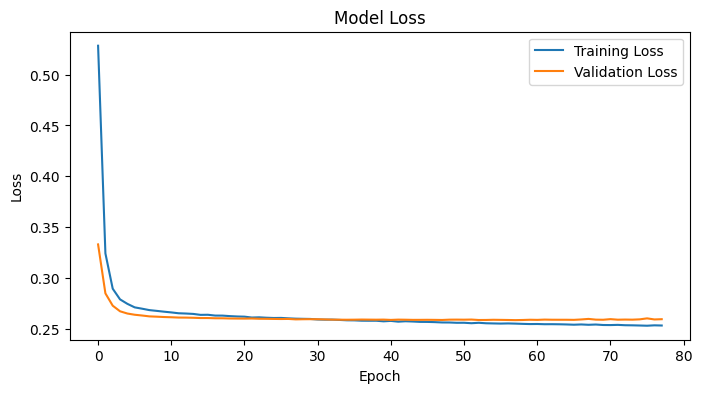

In [69]:
nn_model = gen_nn_model(x_train_scaled,y_train,x_test_scaled,y_test)

In [70]:
gen_evaluate_nn_model(nn_model,x_test_scaled,y_test)

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

 ROC-AUC Score: 0.9046

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 7011  8524]
 [  295 63376]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [88]:
nn_pred = nn_model.predict(x_test_scaled).flatten()

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [67]:
##naive

In [80]:
naive_model = gen_naive_bayes_model(x_train_scaled, y_train)

In [81]:
gen_evaluate_model_except_nn(naive_model, x_test_scaled, y_test)



 ROC-AUC Score: 0.8663

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6659  8876]
 [   26 63645]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.94      0.71      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [82]:
naive_pred = naive_model.predict_proba(x_test_scaled)[:,1]

In [83]:
##lets try ensemble +voting

In [89]:
evaluate_model_voting(lr_pred, rf_pred,xg_pred, nn_pred,naive_pred, y_test)


 ROC-AUC Score: 0.9014

 Best threshold for F1: 0.3760

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6993  8542]
 [  272 63399]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15535
           1       0.88      1.00      0.94     63671

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [6]:
## ensemble

In [149]:
x = df.drop("loan_repaid", axis=1).values
y = df["loan_repaid"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train_scaled, x_test_scaled, scaler = scale_data(x_train, x_test)

# Create Easy Ensemble subsets (as in your code)
train_df = pd.DataFrame(x_train, columns=df.drop("loan_repaid", axis=1).columns)
train_df["loan_repaid"] = y_train
train_df_minor = train_df[train_df["loan_repaid"] == 0]
train_df_major = train_df[train_df["loan_repaid"] == 1]

df_final = pd.concat([train_df_major[0:62138], train_df_minor], axis=0)
df_final1 = pd.concat([train_df_major[62138:124276], train_df_minor], axis=0)
df_final2 = pd.concat([train_df_major[124276:186414], train_df_minor], axis=0)
df_final3 = pd.concat([train_df_major[186414:254686], train_df_minor], axis=0)

subsets = [df_final, df_final1, df_final2, df_final3]

In [27]:
##ensemble Linear Regression

In [37]:
ensemble_lr = ensemble_lr_model(subsets,scaler,class_weight_dict)

[[12335    93]
 [ 6501  5927]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.79     12428
           1       0.98      0.48      0.64     12428

    accuracy                           0.73     24856
   macro avg       0.82      0.73      0.72     24856
weighted avg       0.82      0.73      0.72     24856

[[12335    93]
 [ 6580  5848]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.79     12428
           1       0.98      0.47      0.64     12428

    accuracy                           0.73     24856
   macro avg       0.82      0.73      0.71     24856
weighted avg       0.82      0.73      0.71     24856

[[12332    96]
 [ 6489  5939]]
              precision    recall  f1-score   support

           0       0.66      0.99      0.79     12428
           1       0.98      0.48      0.64     12428

    accuracy                           0.74     24856
   macro avg       0.82      0.74  

In [38]:
ensemble_model_evaluation_except_nn(x_test_scaled, y_test,ensemble_lr)


 ROC-AUC Score: 0.9034

 Best threshold for F1: 0.0526

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6772  8763]
 [   83 63588]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [40]:
##ensemble rf model

In [99]:
ensemble_rf = ensemble_rf_model(subsets,scaler,class_weight_dict)

[[ 9425  3003]
 [ 2271 10157]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78     12428
           1       0.77      0.82      0.79     12428

    accuracy                           0.79     24856
   macro avg       0.79      0.79      0.79     24856
weighted avg       0.79      0.79      0.79     24856

[[ 9489  2939]
 [ 2185 10243]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79     12428
           1       0.78      0.82      0.80     12428

    accuracy                           0.79     24856
   macro avg       0.79      0.79      0.79     24856
weighted avg       0.79      0.79      0.79     24856

[[ 9453  2975]
 [ 2176 10252]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79     12428
           1       0.78      0.82      0.80     12428

    accuracy                           0.79     24856
   macro avg       0.79      0.79  

In [100]:
ensemble_model_evaluation_except_nn(x_test_scaled, y_test,ensemble_rf)


 ROC-AUC Score: 0.8920

 Best threshold for F1: 0.2150

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6922  8613]
 [  261 63410]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [ ]:
##ensemble xg

In [49]:
ensemble_XGBoost=ensemble_XGBoost_model(subsets,scaler)

C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [04:03:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[ 9663  2765]
 [ 2320 10108]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     12428
           1       0.79      0.81      0.80     12428

    accuracy                           0.80     24856
   macro avg       0.80      0.80      0.80     24856
weighted avg       0.80      0.80      0.80     24856



C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [04:03:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[ 9687  2741]
 [ 2273 10155]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     12428
           1       0.79      0.82      0.80     12428

    accuracy                           0.80     24856
   macro avg       0.80      0.80      0.80     24856
weighted avg       0.80      0.80      0.80     24856



C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [04:03:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[ 9626  2802]
 [ 2215 10213]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     12428
           1       0.78      0.82      0.80     12428

    accuracy                           0.80     24856
   macro avg       0.80      0.80      0.80     24856
weighted avg       0.80      0.80      0.80     24856



C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [04:03:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[ 9173  3255]
 [ 2056 11598]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     12428
           1       0.78      0.85      0.81     13654

    accuracy                           0.80     26082
   macro avg       0.80      0.79      0.79     26082
weighted avg       0.80      0.80      0.80     26082



In [50]:
ensemble_model_evaluation_except_nn(x_test_scaled, y_test,ensemble_XGBoost)


 ROC-AUC Score: 0.8963

 Best threshold for F1: 0.2658

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6817  8718]
 [  129 63542]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [11]:
##ensemble nn

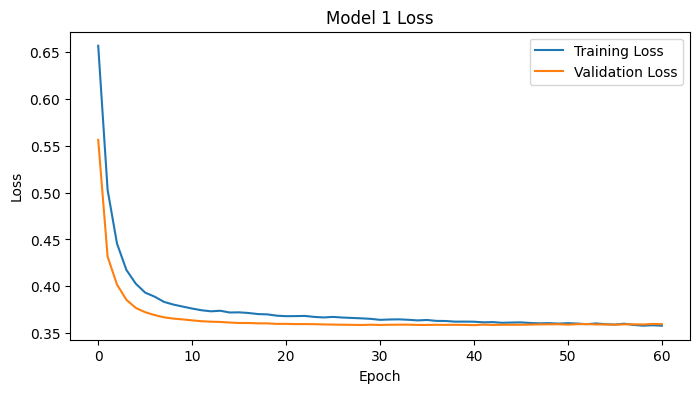

777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[10137  2291]
 [ 2701  9727]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     12428
           1       0.81      0.78      0.80     12428

    accuracy                           0.80     24856
   macro avg       0.80      0.80      0.80     24856
weighted avg       0.80      0.80      0.80     24856



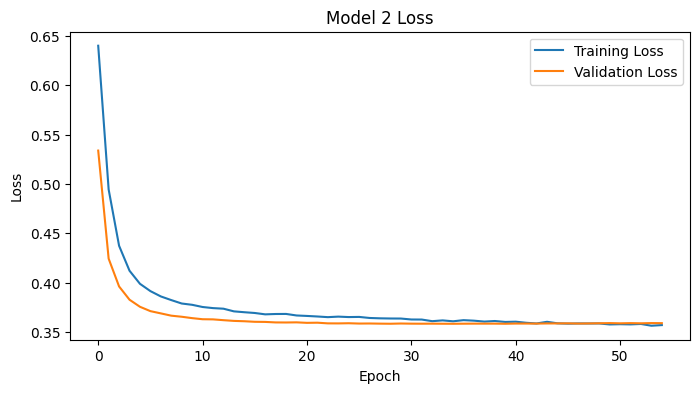

777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[10005  2423]
 [ 2521  9907]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     12428
           1       0.80      0.80      0.80     12428

    accuracy                           0.80     24856
   macro avg       0.80      0.80      0.80     24856
weighted avg       0.80      0.80      0.80     24856



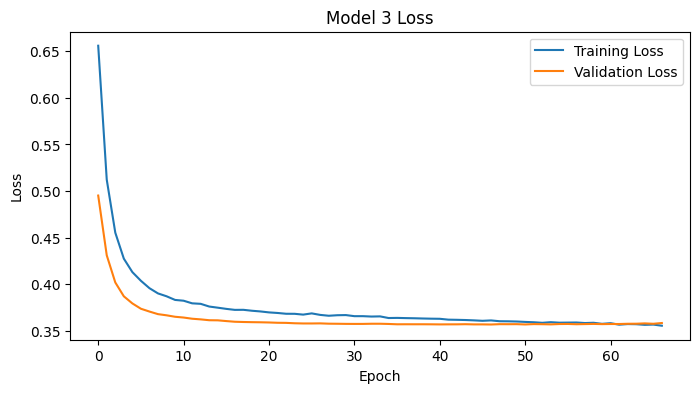

777/777 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[10294  2134]
 [ 2885  9543]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80     12428
           1       0.82      0.77      0.79     12428

    accuracy                           0.80     24856
   macro avg       0.80      0.80      0.80     24856
weighted avg       0.80      0.80      0.80     24856



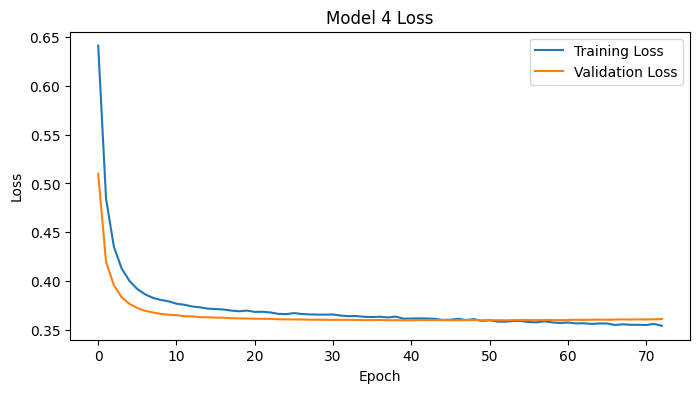

816/816 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 9561  2867]
 [ 2346 11308]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79     12428
           1       0.80      0.83      0.81     13654

    accuracy                           0.80     26082
   macro avg       0.80      0.80      0.80     26082
weighted avg       0.80      0.80      0.80     26082



In [103]:
ensemble_nn_subset = ensemble_nn_model(subsets,scaler)

In [55]:
ensemble_nn_model_evaluation(x_test_scaled, y_test,ensemble_nn_model)

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

 ROC-AUC Score: 0.9031

 Best threshold for F1: 0.1618

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6758  8777]
 [   70 63601]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [93]:
##ensemble voting

In [107]:
ensemble_evaluate_model_voting(ensemble_lr, ensemble_rf, ensemble_XGBoost,ensemble_nn_subset, x_test_scaled, y_test)

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

 ROC-AUC Score: 0.9052

🔍 Best threshold for F1: 0.1767

✅ Final Ensemble Confusion Matrix (Optimized Threshold):
[[ 6776  8759]
 [   86 63585]]

✅ Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15535
           1       0.88      1.00      0.93     63671

    accuracy                           0.89     79206
   macro avg       0.93      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [109]:
##SMOTE

In [126]:
x_train_scaled,y_train_res,x_test_scaled,y_test,scaler = smote_sampling(df,random_state=42)

In [112]:
smote_lr_model = logistic_model(x_train_scaled,y_train_res)

In [115]:
gen_evaluate_nn_model(smote_lr_model,x_test_scaled,y_test)


 ROC-AUC Score: 0.7955

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[15535     0]
 [63671     0]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33     15535
           1       0.00      0.00      0.00     63671

    accuracy                           0.20     79206
   macro avg       0.10      0.50      0.16     79206
weighted avg       0.04      0.20      0.06     79206



C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [128]:
smote_rf_model = rf_model(x_train_scaled,y_train_res)

In [129]:
gen_evaluate_nn_model(smote_rf_model,x_test_scaled,y_test)


 ROC-AUC Score: 0.7267

 Final Ensemble Confusion Matrix (Optimized Threshold):
[[15535     0]
 [63671     0]]

 Final Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33     15535
           1       0.00      0.00      0.00     63671

    accuracy                           0.20     79206
   macro avg       0.10      0.50      0.16     79206
weighted avg       0.04      0.20      0.06     79206



C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surajit.Maity\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [130]:
## as smote is not performing well, lets not continue

In [131]:
## Lets do plotting to understand which model is better:

In [ ]:
## lets do withot ensemble ROC-Auc curve

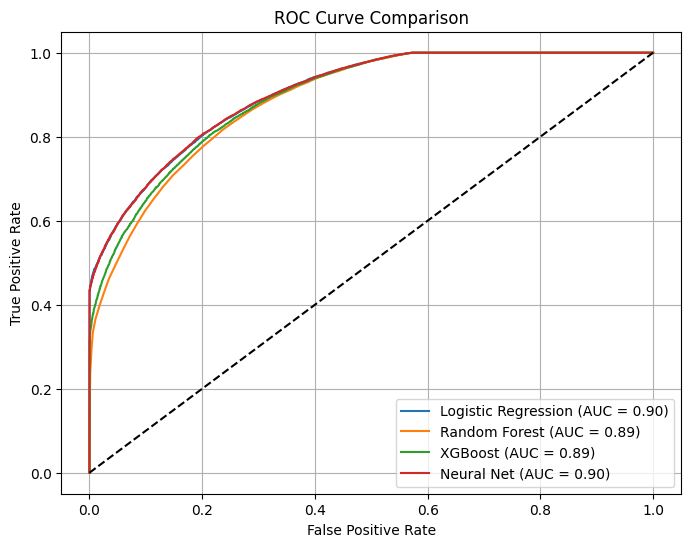

In [163]:
gen_evaluate_model_ROC_AUC_from_predictions(lr_pred, rf_pred,xg_pred, nn_pred, y_test)

In [ ]:
##Precision-Recall (PR) Curve for without ensemble method

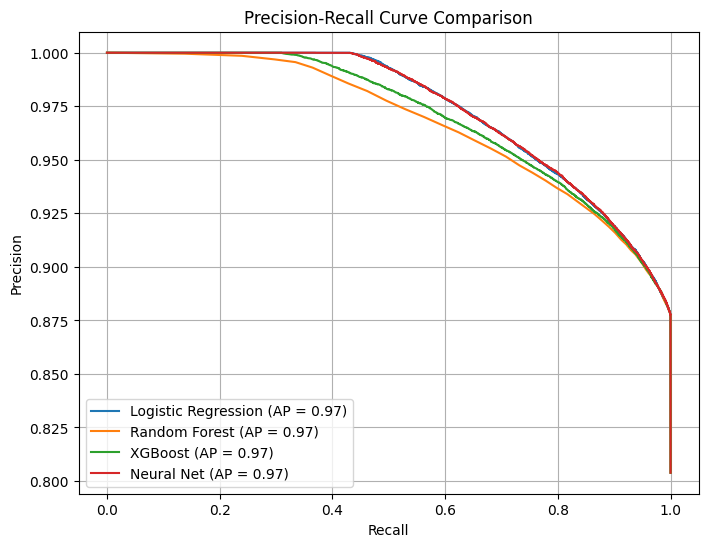

In [164]:
gen_plot_precision_recall_from_predictions(lr_pred, rf_pred,xg_pred, nn_pred, y_test)

In [143]:
##ensemble comparisn

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


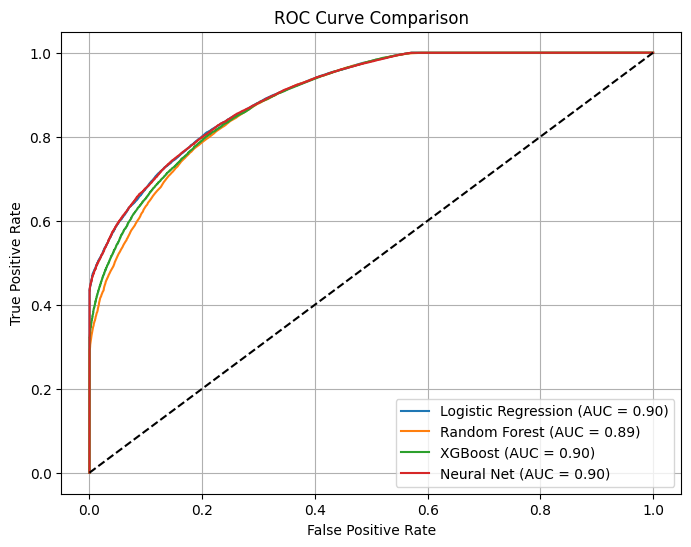

In [151]:
ensemble_evaluate_model_ROC_AUC_from_predictions(ensemble_lr, ensemble_rf, ensemble_XGBoost,ensemble_nn_subset, x_test_scaled, y_test)

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


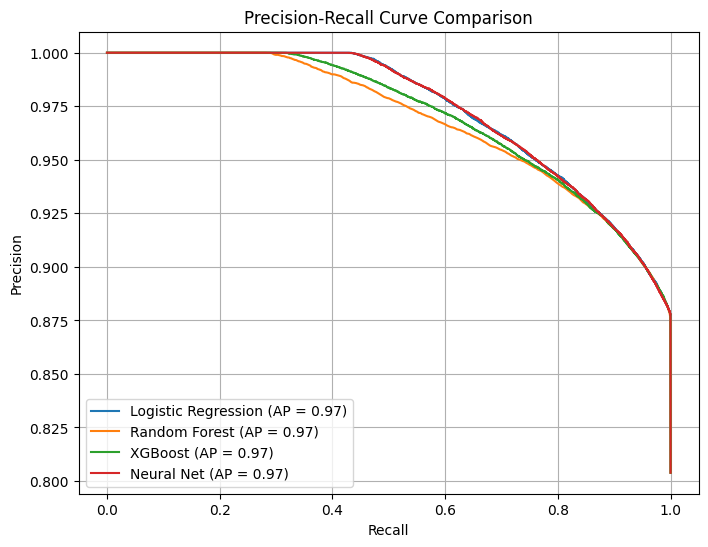

In [150]:
ensemble_plot_precision_recall_from_predictions(ensemble_lr, ensemble_rf, ensemble_XGBoost,ensemble_nn_subset, x_test_scaled, y_test)